In [2]:
#Using Pandas to read the csv file taken from wireshark
import pandas as pd
df = pd.read_csv("packets.csv")

In [3]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.1.6,142.250.82.20,UDP,164,56268 > 19305 Len=122
1,2,0.000134,192.168.1.6,142.250.82.20,UDP,86,56268 > 19305 Len=44
2,3,0.008693,192.168.1.6,142.250.82.20,UDP,162,56268 > 19305 Len=120
3,4,0.028535,192.168.1.6,142.250.82.20,UDP,163,56268 > 19305 Len=121
4,5,0.036888,142.250.82.20,192.168.1.6,RTCP,110,Application specific subtype=13


In [6]:
df.shape

(115013, 7)

In [19]:
# To block the packets sent by our computer as we want to analyze only incomming traffic
pac = df[df.Source!='192.168.1.73']

In [21]:
pac.shape

(115013, 7)

In [22]:
#Using groupby method to group attributes according to protocols and count the different types of protocol
pac = df.groupby('Protocol').Source.count()
pac

Protocol
ADwin Config                4
AJP13                       1
ARP                       169
DNS                       204
DTLSv1.2                  122
HTTP                        3
ICMP                       20
ICMPv6                    166
IEEE 802.15.4              15
IGMPv3                    175
MDNS                     1794
NXP 802.15.4 SNIFFER       40
OCSP                        1
QUIC                     2463
RTCP                    16095
SSDP                      578
STUN                      880
TCP                     10960
TLSv1.2                  1072
TLSv1.3                   473
UDP                     79711
Name: Source, dtype: int64

In [23]:
#Sorting the counted Protocols on ascending order
pac.sort_values()

Protocol
AJP13                       1
OCSP                        1
HTTP                        3
ADwin Config                4
IEEE 802.15.4              15
ICMP                       20
NXP 802.15.4 SNIFFER       40
DTLSv1.2                  122
ICMPv6                    166
ARP                       169
IGMPv3                    175
DNS                       204
TLSv1.3                   473
SSDP                      578
STUN                      880
TLSv1.2                  1072
MDNS                     1794
QUIC                     2463
TCP                     10960
RTCP                    16095
UDP                     79711
Name: Source, dtype: int64

In [28]:
#To see the columns present in out dataframe
df.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')

In [31]:
#Gives first five tuples of the dataframe
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.1.6,142.250.82.20,UDP,164,56268 > 19305 Len=122
1,2,0.000134,192.168.1.6,142.250.82.20,UDP,86,56268 > 19305 Len=44
2,3,0.008693,192.168.1.6,142.250.82.20,UDP,162,56268 > 19305 Len=120
3,4,0.028535,192.168.1.6,142.250.82.20,UDP,163,56268 > 19305 Len=121
4,5,0.036888,142.250.82.20,192.168.1.6,RTCP,110,Application specific subtype=13


In [32]:
#Filtering the TCP Protocols from the dataset and to display first five tuples using head()
df[df['Protocol']=='TCP'].head()

,No.,Time,Source,Destination,Protocol,Length,Info
613,614,4.205302,192.168.1.6,192.168.1.5,TCP,164,"64145 > 8009 [PSH, ACK] Seq=1 Ack=1 Win=508 ..."
615,616,4.209866,192.168.1.5,192.168.1.6,TCP,164,"8009 > 64145 [PSH, ACK] Seq=1 Ack=111 Win=14..."
624,625,4.258107,192.168.1.6,192.168.1.5,TCP,54,64145 > 8009 [ACK] Seq=111 Ack=111 Win=508 L...
970,971,7.786027,192.168.1.6,172.67.75.39,TCP,55,57075 > 443 [ACK] Seq=1 Ack=1 Win=513 Len=1 ...
971,972,7.788321,172.67.75.39,192.168.1.6,TCP,66,443 > 57075 [ACK] Seq=1 Ack=2 Win=64 Len=0 S...


<AxesSubplot:>

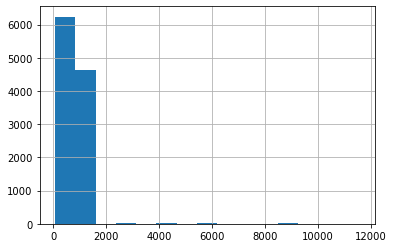

In [33]:
#Using matplotlib to plot the histogram and visually see how the TCP Protocol has been spread(range of TCP Protocol)
%matplotlib inline
df[df['Protocol']=='TCP'].Length.hist(bins=15)

<AxesSubplot:>

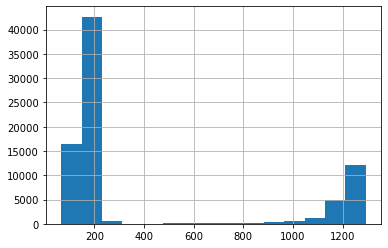

In [34]:
df[df['Protocol']=='UDP'].Length.hist(bins=15)

<AxesSubplot:xlabel='Protocol'>

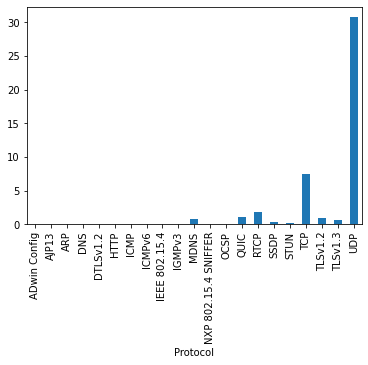

In [35]:
#Visualizing using Bar Chart
disp = df.groupby('Protocol').Length.sum()
a = disp/(1024*1024)
a.plot(kind='bar')

<AxesSubplot:xlabel='Protocol'>

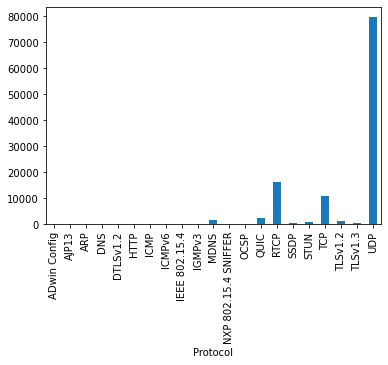

In [37]:
pac_count = df.groupby('Protocol').Source.count()
pac_count.plot(kind='bar')

<AxesSubplot:xlabel='Protocol'>

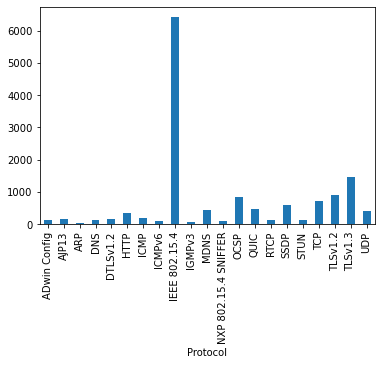

In [38]:
#To find the average packet size by packet count
av = disp/pac_count
av.plot(kind='bar')